In [1]:
from scipy import integrate
import numpy as np

f = lambda y, x: x*y**2

integrate.nquad(f, [[1, np.inf],[0, np.inf]])

(0.2000000000189363, 1.3682975855986121e-08)

C:\Development\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\esultano\AppData\Local\Temp/ipykernel_21288/1979869801.py:31: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf1 = ax1.plot_surface(X, Y, Z)


<function matplotlib.pyplot.show(close=None, block=None)>

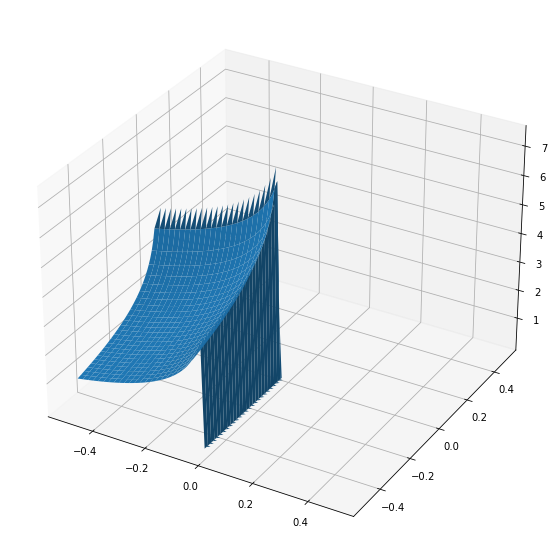

In [17]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

arr_x = np.arange(-0.5,0.5,0.01)
arr_y = np.arange(-0.5,0.5,0.01)
X,Y = np.meshgrid(arr_x, arr_y)
Z = np.empty([arr_x.size, arr_y.size])
Z[:] = np.nan

#https://www.wolframalpha.com/input/?i=integral+%28e%5E%28-x*y%29%29+dxdy
f = lambda y, x: np.exp(-x*y)

def integrand(x, y):
    m = integrate.dblquad(f, -np.inf, x, lambda x: -np.inf, lambda x: y)
    return m[0]

for idx_x, x in enumerate(arr_x):
    if x < 0:
        for idx_y, y in enumerate(arr_y):
            if y < 0:
                Z[idx_x][idx_y] = integrand(x, y)

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.view_init(30, -60) #default is (30, -60)=(ax1.elev, ax1.azim)
#print([ax1.elev, ax1.azim])
surf1 = ax1.plot_surface(X, Y, Z)

plt.show

C:\Users\esultano\AppData\Local\Temp/ipykernel_21288/3074116261.py:50: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)


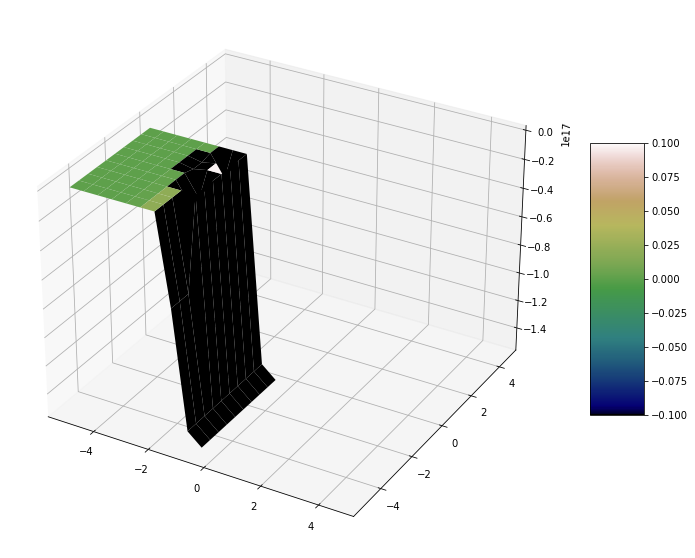

In [20]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

arr_x = np.arange(-5,5,0.5)
arr_y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(arr_x, arr_y)
Z = np.empty([arr_x.size, arr_y.size])
Z[:] = np.nan

#https://www.wolframalpha.com/input/?i=x*e%5E%28-x%5E2-y%5E2%29
#https://www.wolframalpha.com/input/?i=derivative+of+x*e%5E%28-x%5E2-y%5E2%29
def deriv_y(x,y):
    return x, 2*x*y*np.exp(-x**2-y**2)

def deriv_x(x,y):
    return (1-2*x**2)*np.exp(-x**2-y**2)

def chain(x,y):
    res_x, res_y = deriv_y(x,y)
    res_xx = deriv_x(res_x, res_y)
    return res_xx

def integrand(x, y):
    m = integrate.dblquad(chain, -np.inf, x, lambda x: -np.inf, lambda x: y)
    return m[0]

for idx_x, x in enumerate(arr_x):
    if x < 0:
        for idx_y, y in enumerate(arr_y):
            if y < 0:
                Z[idx_x][idx_y] = integrand(x, y)

#for idx_x, x in enumerate(arr_x):
#   for idx_y, y in enumerate(arr_y):
       #m = integrate.nquad(deriv_x, [bounds_x(y), bounds_y])
       #m = integrate.nquad(chain, [bounds_x(y), bounds_y])
       #m = integrate.quad(chain, 0, np.inf, args=(x))
       # m[0] is the value of integral
       # m[1] is the estimate of the absolute error in the value of integral

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.view_init(30, -60) #default is (30, -60)=(ax1.elev, ax1.azim)
#print([ax1.elev, ax1.azim])
mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()

In [5]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

arr_x = np.arange(-1,1,0.1)
arr_y = np.arange(-1,1,0.1)
X,Y = np.meshgrid(arr_x, arr_y)
Z = np.zeros([arr_x.size, arr_y.size])
I = 1j

for idx_a, a in enumerate(arr_x):
   for idx_b, b in enumerate(arr_y):
       f = lambda x, t: np.exp((-a*t**2+I*b*t)/(3*t**2+1)+I*t*x)*(x/(3*t**2+1))
       m = integrate.dblquad(f, 0, np.inf, lambda x: -np.inf, lambda x: np.inf)
       Z[idx_a][idx_b] = m[0]

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('gist_earth')
ax1.set_xlabel('a')
ax1.set_ylabel('b')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()

C:\Development\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
C:\Development\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Development\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singul